In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec as gridspec
import pandas as pd
import numpy as np
import scipy.stats as ss

def correl(X, Y):
    """Computes the Pearson correlation coefficient and a 95% confidence
    interval based on the data in X and Y."""
    r = np.corrcoef(X, Y)[0,1]
    f = 0.5*np.log((1+r)/(1-r))
    se = 1/np.sqrt(len(X)-3)
    ucl = f + 2*se
    lcl = f - 2*se
    #
    lcl = (np.exp(2*lcl) - 1) / (np.exp(2*lcl) + 1)
    ucl = (np.exp(2*ucl) - 1) / (np.exp(2*ucl) + 1)
    return r,lcl,ucl

def draw_colormap (cmap_name,width=30,height=4,fontsize=50,fig = None, ax=None,
                  ticklabels_bd = (0,1), num_ticks =11):
    """
    cmap_name is a string.
    """
    if fig is None:
        fig = plt.figure(figsize=(width,height))
    if ax is None:
        ax = plt.gca()
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto',cmap=plt.get_cmap(cmap_name))
    ax.set_xticks(np.linspace(0,256,num_ticks))
    ax.set_xticklabels(np.linspace(ticklabels_bd[0],ticklabels_bd[1],num_ticks))
    ax.set_yticklabels([])
Phenotype1='/storage/resources/datasets/gtex/59533/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v7.p2.c1.GRU/PhenotypeFiles/phs000424.v7.pht002743.v7.p2.c1.GTEx_Sample_Attributes.GRU.txt.gz'
Phenotype2='/storage/resources/datasets/gtex/59533/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v7.p2.c1.GRU/PhenotypeFiles/phs000424.v7.pht002742.v7.p2.c1.GTEx_Subject_Phenotypes.GRU.txt.gz'
PEERs = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Adipose-Subcutaneous/peerFactors.tsv'


In [2]:
#Get peerfactors #V1 V2 V3 V4 ... V17
peerfactors = pd.read_csv(PEERs,sep='\t') ; print(peerfactors.shape)
idx = sorted([x.replace('.','-') for x in list(peerfactors.index)])
peerfactors.index = idx
#peerfactors

(309, 78)


In [3]:
IT=pd.read_csv(Phenotype2, compression='gzip', sep='\t', quotechar='"', skiprows=10)
ind=['SUBJID','AGE','TRISCHD','RACE','SEX', 'DTHHRDY', 'HGHT']
Ischtime = IT[ind].copy()
Isctime=Ischtime.loc[Ischtime['SUBJID'].isin(idx)].copy()
#Isctime=Isctime.loc[Isctime['SUBJID'].isin(L)]
Index=['V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']
print(Isctime.shape, Isctime.columns)

RACE=[ss.spearmanr(peerfactors[YY].values,Isctime['RACE'].values).correlation for YY in Index]
GENDER=[ss.spearmanr(peerfactors[YY].values,Isctime['SEX'].values).correlation for YY in Index]
HGHT = [ss.spearmanr(peerfactors[YY].values,Isctime['HGHT'].values).correlation for YY in Index]


(309, 7) Index(['SUBJID', 'AGE', 'TRISCHD', 'RACE', 'SEX', 'DTHHRDY', 'HGHT'], dtype='object')


In [4]:
#Get covariates & Other phenotypes
    #AGE - RACE - ETHNICITY
    #Get Sample variabls from phonotype table
IT1=pd.read_csv(Phenotype1, compression='gzip', sep='\t', quotechar='"', skiprows=10)
IT = IT1.loc[IT1['SMMTRLTP'].isin(['Whole Blood:Whole Blood'])].copy() #
IT['SAMPID'] = ['-'.join(x.split('-')[:2]) for x in list(IT['SAMPID'])]
code=['SAMPID','SMGEBTCH','SMTSISCH','SMTPAX','SMTSTPTREF','SMNABTCH','SMCENTER','in']
print(len(set(list(IT['SAMPID']))))
IT['in'] = IT['SMGEBTCH'].astype(str).apply(lambda x: 1 if "GTEx_" in x else 0)
Vars = IT.loc[IT['in']==1].loc[:,code].copy()
print(len(set(list(Vars['SAMPID']))))
Vars = Vars.loc[Vars['SAMPID'].isin(idx)]   #Select only the we are interested in
Vars = Vars.groupby('SAMPID').first()      #There Duplicate... Remove it
print(Vars.shape, ' Next... peer')

679
406
(239, 7)  Next... peer


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/lib64/python3.4/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [6]:
#Get all matching samples Expr--Phenotypes
L=list(Vars.index)
#Peers
peerfactors = peerfactors.loc[peerfactors.index.isin(L)]
#Lab phenotypes
SMTSISCH = [ss.pearsonr(peerfactors[YY].values,Vars['SMTSISCH'].values)[0] for YY in Index]
SMTSISCH = [ss.spearmanr(peerfactors[YY].values,Vars['SMTSISCH'].values).correlation for YY in Index]
SMCENTER = [ss.spearmanr(peerfactors[YY].values,Vars['SMCENTER'].values).correlation for YY in Index]
SMTSTPTREF =[ss.spearmanr(peerfactors[YY].values,Vars['SMTSTPTREF'].values).correlation for YY in Index]
#Sample phenotypes
IT=pd.read_csv(Phenotype2, compression='gzip', sep='\t', quotechar='"', skiprows=10)
#IT['SAMPID'] = [x[:9] for x in list(IT['SAMPID'])]
ind=['SUBJID','AGE','TRISCHD','RACE','GENDER', 'DTHHRDY', 'SMTSISCH']
Ischtime = IT.loc[:,ind]
Isctime=Ischtime.loc[Ischtime['SUBJID'].isin(idx)]
Isctime=Isctime.loc[Isctime['SUBJID'].isin(L)]
print(Isctime.shape)
TRISCHD=[ss.pearsonr(peerfactors[YY].values,Isctime['TRISCHD'].values)[0] for YY in Index]
DTHHRDY=[ss.spearmanr(peerfactors[YY].values,Isctime['DTHHRDY'].values).correlation for YY in Index]
AGE = [ss.pearsonr(peerfactors[YY].values,Isctime['AGE'].values)[0] for YY in Index]



(239, 7)


/usr/lib64/python3.4/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/lib64/python3.4/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [7]:
df = pd.DataFrame( {'SAMPLE.TIME.ISCH': SMTSISCH,'SAMPLE.CENTER':SMCENTER,'SMTSTPTREF':SMTSTPTREF,
     'ISCHEMIC.TIME': TRISCHD,'DTH.OF.DAY':DTHHRDY, 'AGE':AGE, "HEIGHT":HGHT, "GENDER":GENDER, "RACE":RACE }, index=Index)
df

,AGE,DTH.OF.DAY,GENDER,HEIGHT,ISCHEMIC.TIME,RACE,SAMPLE.CENTER,SAMPLE.TIME.ISCH,SMTSTPTREF
V2,0.218543,0.074733,-0.147677,0.112843,0.113000,-0.086921,0.065026,0.079657,0.075069
V3,0.022917,0.260999,-0.075000,0.059035,0.263341,-0.126389,0.088491,0.236194,0.202366
V4,-0.225692,-0.062279,-0.004870,-0.032371,-0.026030,0.081288,0.076921,0.048002,-0.086165
V5,-0.143058,-0.271790,0.045330,-0.083413,-0.298044,0.087591,-0.116700,-0.244365,0.017904
V6,0.274601,0.431882,-0.190609,0.141857,0.554854,-0.049843,0.368053,0.511829,0.124832
V7,0.306246,0.576156,-0.044955,0.125572,0.520526,-0.063370,0.286588,0.514967,0.255249
V8,-0.098094,-0.132419,0.020679,-0.062004,-0.187578,-0.039956,-0.038003,-0.164274,-0.119371
V9,0.103236,-0.012602,-0.146703,0.132056,0.063173,0.016213,0.035091,-0.004105,0.055726
V10,0.019225,0.230814,-0.072303,0.028613,0.214522,-0.058839,0.160599,0.272133,0.171853
V11,-0.142115,0.172076,-0.007867,0.034650,0.189901,0.022743,0.130661,0.248764,0.024914


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


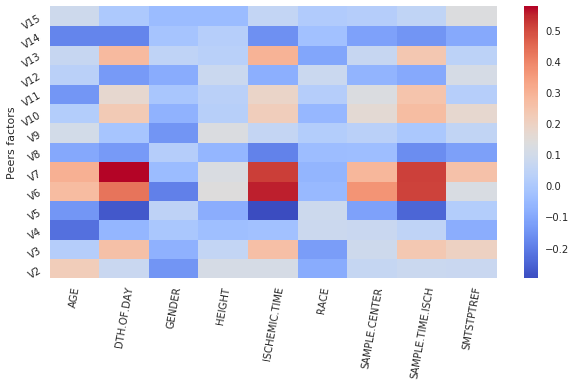

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
plt.pcolor(df,cmap='coolwarm')
#labels
ax.set_xticks(np.arange(df.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df.shape[0]) + 0.5, minor=False)

labels = list(df.columns) ###[AGE	DTHHRDY	SMCENTER	SMTSISCH	SMTSTPTREF	TRISCHD]
#labels = ["Age", "Date_day", "Testing center", "Sample Ischemic time", "Sample_Ref", "Ischemic time"]
ax.set_xticklabels(labels, rotation=80)
ax.set_yticklabels(df.index,rotation=30)
plt.ylabel('Peers factors')
plt.colorbar()
#plt.axis('off')
#gs = gridspec(2, 1, height_ratios=[8, 1])  # 2 rows, 1 columns
#ax0=plt.subplot(gs[0])  # First row 1 column
#ax0.pcolor(df,cmap='coolwarm')###########
#ax0.set_xticks([i for i in range(len(labels))], minor=True)
#ax1=plt.subplot(gs[1]) # Second row 1 column
#draw_colormap('coolwarm',fig=fig,ax=ax1,ticklabels_bd=([i for i in np.arange (-0.5,0.5,0.01)]))


plt.grid(False)
plt.show()

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


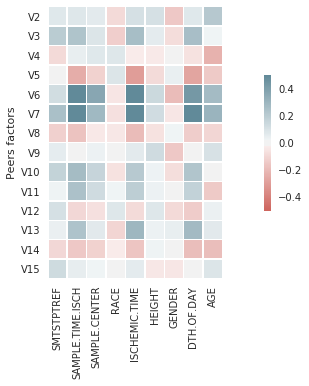

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,5))
cmap = sns.diverging_palette(15, 220, s=50, l=55, n=10, as_cmap=True)
sns.heatmap(df, cmap=cmap,  annot_kws={"size": 8},
            vmin=-0.5, vmax=0.5, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
);
plt.ylabel('Peers factors')
ax.invert_xaxis();

plt.show()